#**Laboratorio: Descenso de gradiente estocástico**

El descenso de gradiente estocástico es un método de optimización basado en el descenso de gradiente que calcula el gradiente de una función basado en un subconjunto de los datos totales. La diferencia respecto al descenso de gradiente convencional es que en lugar de calcular el gradiente con todos los datos, calcula un estimado de gradiente tomando un solo dato del set de datos en lugar del set completo. Esto resulta útil ya que disminuye la complejidad y el uso de recursos computacionales requeridos en el cálculo del gradiente. En este laboratorio resolveremos el problema de regresión lineal usando el descenso de gradiente estocástico.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(354)

## **Introducción**
La regresión lineal busca encontrar los parámetros de una ecuación  que precedice el valor de una variable  $y$ a partir de las variables en el vector $x$. Las variables en $x$ se conocen como predictores y los parámetros de la ecuación se denotan por $w$. La búsqueda de los parámetros de la ecuación, es decir, $w$, usualmente se realiza usando un conjunto de observaciones de estas variables. Este modelo se usa en múltiples campos y comprender su funcionamento es fundamental en inteligencia artificial.


Considere el conjunto de observaciones:

\begin{align*}
   \{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), ... , (x^{(m)},y^{(m)})\}.
 \end{align*}

Para este ejercicio, asumamos que la relación entre la variables $x$ y $y$ se define mediante la siguiente ecuación:
\begin{align*}
  y^* = g(x; w)=w_{0} + w_1 x,\\
 \end{align*}
donde los $w_i$ son los coeficientes de la ecuación que deben ser encontrados a través la resolución de un problema de optimización. Dicho problema se denomina problema de *mínimos cuadrados*, el cual busca los valores de $w$ tales que se minimice la distancia al cuadrado entre los valores de $y^{(j)}$ (es decir, el valor de $y$ observado) y $g(x^{(j)};w)$ (es decir, el valor de $y$ estimado por la ecuación).  De forma matemática, el problema se formula como :

\begin{align*}
  \min_{w\in\mathbb{R}^n} \left | \left|  y^{(j)}-g\left (x^{(j)};w \right)  \right| \right|_2^2 .
 \end{align*}

 La siguiente figura ilustra el resultado de resolver el problema de regresión.

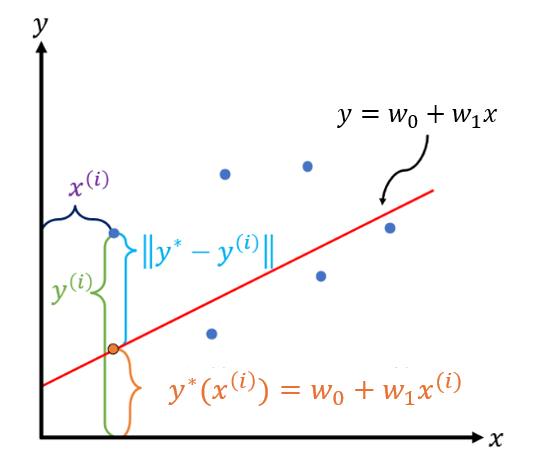

Aquí, $w = [w_0, w_1]^T$. Hay que notar que el problema de optimización anterior se puede reescribir como:
\begin{align*}
  \min_{w\in\mathbb{R}^n}\left | \left| y^{(j)}-\left ( w_{0} + w_1 x^{(j)} \right)\right| \right|_2^2 .
 \end{align*}


La operación $w_{0} + w_1 x^{(j)}$, se puede escribir vectorialmente como:

\begin{align*}
  w_{0} + w_1 x^{(j)} = [1, x^{(j)}] w.
\end{align*}

Lo anterior está escrito para la observación $j$. Para incluir a todos los $m$ puntos, se plantea el siguiente sistema de ecuaciones lineales de forma matricial:
\begin{align*}
   \begin{bmatrix}
      w_{0} + w_1 x^{(1)}\\
      w_{0} + w_1 x^{(2)}\\
      \vdots\\
      w_{0} + w_1 x^{(m)}
   \end{bmatrix}
   =
   \begin{bmatrix}
      1 & x^{(1)}\\
      1 &  x^{(2)}\\
      \vdots & \vdots\\
      1 & x^{(m)}
   \end{bmatrix}
   \begin{bmatrix}
    w_0\\
    w_1
   \end{bmatrix}.
\end{align*}

La matriz que acompaña a $w$ se nombrará $H$. El problema de optimización se reescribe entonces como :
 \begin{align*}
   \min_{w\in\mathbb{R}^n}f(w)=||y-Hw||_2^2,
 \end{align*}

donde $y=[y^{(1)}, y^{(2)}, ..., y^{(m)}]^T$.



## **Ejemplo:**

En este ejemplo demostraremos como se puede dar solución al problema de optimización mediante el método de descenso de gradiente estocástico.


En primer lugar, vamos a generar un set de tuplas $(x,y)$ de forma artificial para verificar el funcionamiento de un método de búsqueda. En este caso, generamos observaciones ruidosas que vienen de la recta: $y=1+2w$. Es decir, sabemos de entrada que el modelo real $w$ es $[1,2]^T$.

In [ ]:
data_x = np.linspace(0,1,100)
data_y = 2*data_x + 1
data_y = data_y + np.random.randn(len(data_y))/5 # Contaminación de las observaciones con ruido aleatorio

A continuación, vamos a graficar los datos generados:

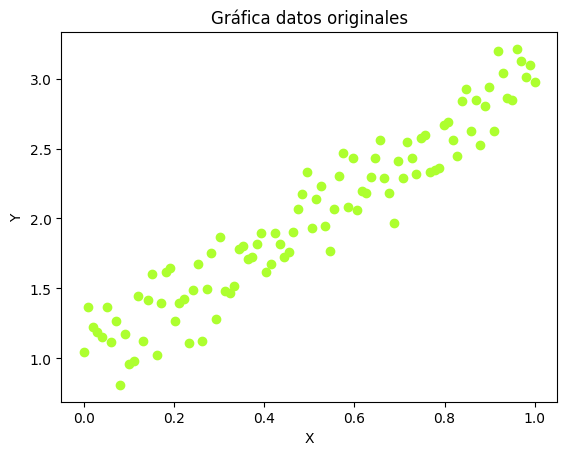

In [ ]:

#Se grafican los datos
plt.scatter(data_x,data_y,color="greenyellow")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gráfica datos originales")
plt.show()

Ahora bien, se tiene que el gradiente de la función a minimizar es: $∇f(w)=-2H^Ty+2H^THw$. Por lo que, primero es necesario definir una función que construya la matriz $H$ asociada a la regresión.

In [ ]:
def matriz_H(N,data):
  H = np.zeros((len(data),N+1))
  for i in range(N+1):
    H[:,i] = data**i
  return H

Se definen la función objetivo y su gradiente:

In [ ]:
# Función
def funcion_obj(w,H,y):
  return (np.linalg.norm(y - H@w))**2

#Gradiente de la función
def gradiente(w,H,y):
  return -2*np.transpose(H)@y+ 2*np.transpose(H)@H@w

Adicionalmente, se utiliza el algoritmo de descenso de gradiente para las funciones anteriores. **NOTA:** La implementación presentada a continuación corresponde al descenso de gradiente estocástico. Para esto, se selecciona una fila al azar de la matriz H y su correspondiente etiqueta en Y y sobre esto se realiza la actualización.

In [ ]:
#Definimos la función de descenso de gradiente estocástico
def SGD(x0,alpha,n,epsilon,H,y):
  hist = [x0]
  hist_fun = [funcion_obj(x0,H,y)]
  converge = False
  k = 0
  while k<=n:

    #Seleccionamos una fila aleatoria de la matriz H
    valor_aleatorio = np.random.randint(0,H.shape[0])
    muestra = H[valor_aleatorio,:].reshape(1,-1)
    y_muestreado = np.array([y[valor_aleatorio]])

    #Actualizamos el punto con la muestra aleatoria tomada
    x_n = hist[k] - alpha*gradiente(hist[k],muestra,y_muestreado)
    hist.append(x_n)
    hist_fun.append(funcion_obj(x_n,H,y))
    if np.linalg.norm(hist[k+1] - hist[k]) <= epsilon:
      converge=True
      break
    k+=1
  return np.array(hist),np.array(hist_fun),converge


**Extracción aleatorio de la fila de la matriz H:** Note que en la línea que define la variable *muestra* se realiza una operación de *reshape(1,-1)*. Esto se realiza dado que si la matriz H tiene 3 columnas, cuando seleccionemos una fila esta fila va a tener dimensiones (3,) y al intentar transponerla vamos a obtener la misma fila. Al hacer la operación de reshape convertimos las dimensiones a (3,1) y garantizamos que se pueda transponer.

Ya con todas las funciones necesarias para darle solución al problema se establecen los valores de los parámetros y se evaluan la función del descenso de gradiente en los mismos.

In [ ]:
w0=np.array([2,3])
n=10000
epsilon=1e-6
H=matriz_H(1,data_x)
algoritmo=SGD(w0,0.05,n,epsilon,H,data_y)
print("Minimizador encontrado:\n",algoritmo[0][-1])

Minimizador encontrado:
 [1.04196626 1.99260903]


#**Gráfica**

En esta parte graficaremos, por un lado, la trayectoria recorrida por el descenso de gradiente estocástico (gráfica de la izquierda) y la recta que resulta de encontrar $w^*=[w_0^*,w_1^*]$ mediante el método de descenso de gradiente (gráfica de la derecha).

In [ ]:
array_x = np.linspace(-1,3)
array_y = np.linspace(0,5)

X,Y = np.meshgrid(array_x,array_y)

F = []
for i in array_x:
  for j in array_y:
    F.append(funcion_obj([i,j],H,data_y))
F = np.array(F).reshape(X.shape)

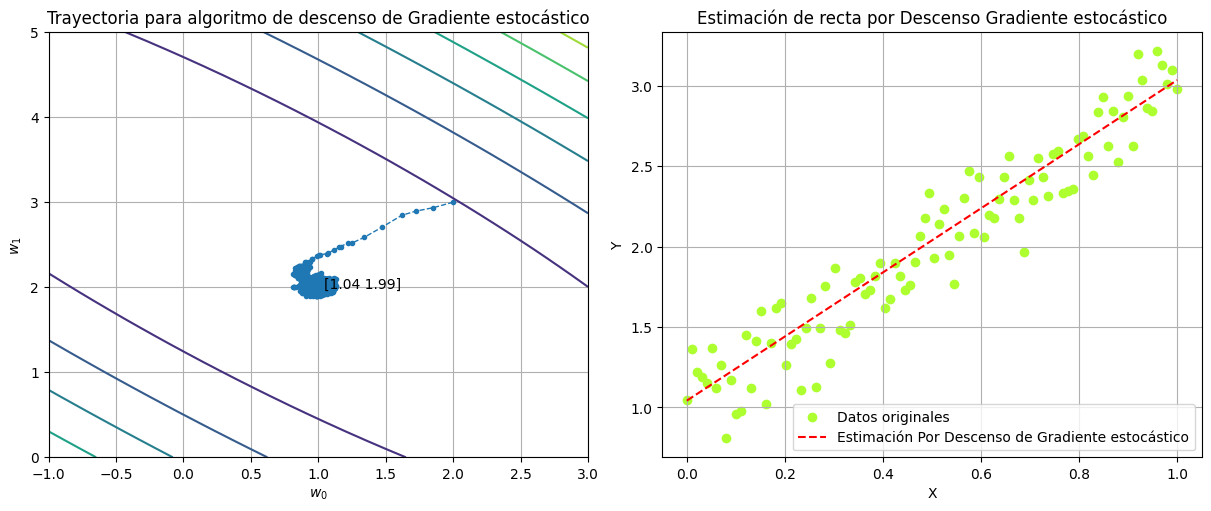

In [ ]:
#Grafica de la trayectoria
fig, ax = plt.subplots(1,2,figsize=(12,5),layout="constrained")
ax[0].plot([i[0] for i in algoritmo[0]],[i[1] for i in algoritmo[0]],'o--',markersize=3,linewidth=1)
ax[0].contour(X,Y,F)
ax[0].text(algoritmo[0][-1][0],algoritmo[0][-1][1],f"{np.round(algoritmo[0][-1],2)}")
ax[0].set(title="Trayectoria para algoritmo de descenso de Gradiente estocástico",xlabel="$w_0$",ylabel="$w_1$")
ax[0].grid()
#Regresión lineal
recta= algoritmo[0][-1][1]*data_x+algoritmo[0][-1][0]
ax[1].scatter(data_x,data_y,color="greenyellow",label="Datos originales")
ax[1].plot(data_x,recta,"--r",label="Estimación Por Descenso de Gradiente estocástico")
ax[1].set(title="Estimación de recta por Descenso Gradiente estocástico",xlabel="X",ylabel="Y")
ax[1].legend(loc='lower right')
ax[1].grid()
plt.show()

Por último, observaremos los primeros 15 pasos de la trayectoria:

In [ ]:
for i,j in algoritmo[0][:15]:
  print(f"({round(i,2)},{round(j,2)})")

(2.0,3.0)
(1.85,2.94)
(1.72,2.9)
(1.62,2.85)
(1.47,2.71)
(1.34,2.59)
(1.25,2.52)
(1.22,2.52)
(1.16,2.48)
(1.17,2.48)
(1.12,2.44)
(1.07,2.4)
(1.06,2.39)
(1.01,2.38)
(1.01,2.38)


Así, observamos que el algoritmo de descenso de gradiente logra identificar los parámetros que planteamos inicialmente para la recta de manera aproximada ($w^* = [1.04,1.99]^T$) aunque dando más saltos como se ve en la gráfica.

##**Comparación:**

**Vamos a comparar los resultados obtenidos con el algoritmo de descenso de gradiente estocástico vs. la solución analítica que hallaremos a continuación.**

 Este método tiene una solución analítica, la cual se puede hallar encontrando su gradiente de la función objetivo e igualándolo a cero. Obteniendo esta solución:
\begin{align*}
  w^* =  (H^TH)^{-1}H^Ty .
 \end{align*}



Teniendo en cuenta lo anterior, vamos a definir la función de la solución: $w^*=(H^T H)^{-1} H^T y$ utilizando la matriz $H$ que ya tenemos.

In [ ]:
def solucion(H,data_y):
  return np.linalg.inv(H.T@H)@H.T@data_y

Y graficamos la solución obtenida junto con los datos originales.

[1.00173006 2.00812251]


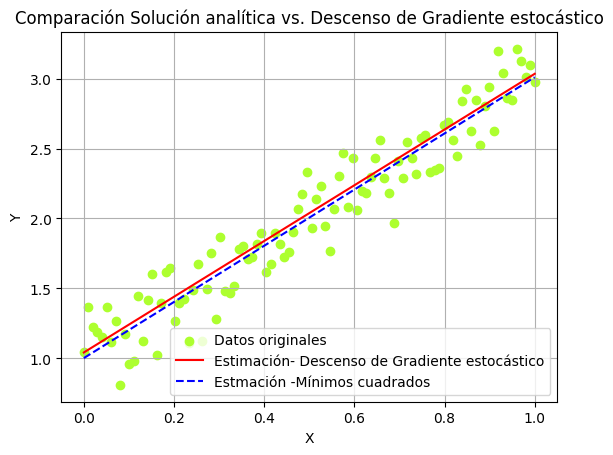

In [ ]:
H_t1 = matriz_H(1,data_x)
w_t1 = solucion(H_t1,data_y)
print(w_t1)

plt.scatter(data_x,data_y,color="greenyellow",label="Datos originales")
plt.title("Comparación Solución analítica vs. Descenso de Gradiente estocástico")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(data_x,recta,"r",label="Estimación- Descenso de Gradiente estocástico")
plt.plot(data_x,H_t1@w_t1,"--b",label="Estmación -Mínimos cuadrados")
plt.grid()

plt.legend(loc='lower right')
plt.show()

Podemos evidenciar que logramos llegar soluciones similares para la regresión lineal utilizando dos métodos distintos (Descenso de gradiente estocástico y Solución analítica), con la diferencia de que el descenso de gradiente estocástico llega de manera aproximada y dando saltos.

##**Ejercicios:**

**1.** Modifique el siguiente código para generar datos siguiendo la ecuación $y = -5x + 2$

In [ ]:
data_x = np.linspace(0,1,100)

#Modifique la línea a continuación según la ecuación dada.
data_y = 6*data_x + 9
data_y = data_y + np.random.randn(len(data_y))/5

**2.** Modifique el siguiente código para que realice el descenso de gradiente estocástico usando como condición inicial el vector $[0,0]^T$, con 3000 iteraciones, un $\epsilon$ de 1e-6 y un $\alpha$ de 0.01.

In [ ]:
x0 = np.array([-10,-10])
n = 1000
epsilon = 1e-6
H = matriz_H(1,data_x)
descenso_estocastico = SGD(x0,0.01,n,epsilon,H,data_y)

**3.** Modifique el siguiente código para que grafique la trayectoria de los algoritmos, las regresiones obtenidas y las curvas de nivel de la función objetivo para un rango de $[-1,6]$ en el eje X y $[-6,2]$ en el eje Y. **NOTA:** Solo modifique los intervalos de las curvas de nivel, asegurese de ejecutar el código una vez ejecutada la celda anterior.

In [ ]:
#Modifique los arrays a continuación según los límites dados.

eje_x = np.linspace(0,10)
eje_y = np.linspace(0,10)
X,Y = np.meshgrid(eje_x,eje_y)

F = []
for i in eje_x:
  for j in eje_y:
    F.append(funcion_obj(np.array([i,j]),H,data_y))

F = np.array(F).reshape(X.shape)

fig,ax = plt.subplots(1,2,figsize=(12,5))
ax[0].plot(descenso_estocastico[0][:,0],descenso_estocastico[0][:,1],"og--",label="Descenso estocastico",markersize=2,linewidth=1)
ax[0].text(descenso_estocastico[0][-1][0],descenso_estocastico[0][-1][1],f"{np.round(descenso_estocastico[0][-1],2)}")
v = ax[0].contour(X,Y,F,levels=10)
fig.colorbar(v)
ax[0].grid()
ax[0].legend()
ax[0].set(title="Trayectoria del descenso estocastico",xlabel="$w_0$",ylabel="$w_1$")
ax[1].scatter(data_x,data_y,label="Datos")
ax[1].plot(data_x,H@descenso_estocastico[0][-1],'g',label="Descenso estocástico")
ax[1].legend()
ax[1].grid()
ax[1].set(title="Regresión obtenida",xlabel="Datos X",ylabel="Datos Y")
plt.show()